# Analysis of the docked protein

## Installing and importing the necessary libraries

In [2]:
# installing the libraries 
# uncomment the lines below to make sure that the required libraries are installed
# install.packages("tidyverse")
# install.packages("ggthemes")
# install.packages("ggplot2")
# install.packages("dplyr")

# importing the libraries
library(tidyverse)
library(ggthemes)
library(ggplot2)
library(dplyr)
library(glue)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Reading the csv file that has the results of the simulation

In [3]:
dock <- read_csv("docked.csv")
head(dock)

Rows: 7335 Columns: 15
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (7): type, previous_aa, new_aa_1l, new_aa_3l, conversion, new_seq, secon...
dbl (8): residue_number, fa_score, ddg_score, hbond_score, sasa_score, diff_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


type,residue_number,previous_aa,new_aa_1l,new_aa_3l,conversion,new_seq,fa_score,ddg_score,hbond_score,sasa_score,secondary_structure,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
wild_type,NA,NA,NA,NA,NA,MEAKTYIGKLKSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRKLDITSHNEDYTIVEQYERAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNTHTDNIEWAPIKAAQLTRPNAELVELEIDTLHGVKTIRCTPDHPVYTKNRGYVRADELTDDDELVVAI,4582.644,0.0000000,228,18665.82,LLLLEEEEEEEEEEEEEEEEEEEEEELLLEEEELLEEEELLLLLLLLLLLLEEEEEEEEEEEELLLLLEEEEEEEEEEEELLLLHHHHHLLLHHHHHHHHLLLLLEEEEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEELLLLLLLHHHLHHHHHHLLHHHLELLLLLLLLLHHHLLLLEEEEEEEEELLLLEEEEEEEEEEELLEEEEEEEEEEELLLLLLLLLLLLEEEELLEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEEEELLLLLEELLLEEEELLLEEEEHHHHHHHHLLLLLLEEEEEELLLLEEEEEEEEEEEEEEEEEEEEEEEEEELLEEEEEEELLLLEEEELLLEEEEHHHLLLLLEEEEEL,0,0.00000,0
mutant,1,M,A,ALA,1MtoA,AEAKTYIGKLKSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRKLDITSHNEDYTIVEQYERAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNTHTDNIEWAPIKAAQLTRPNAELVELEIDTLHGVKTIRCTPDHPVYTKNRGYVRADELTDDDELVVAI,4582.797,0.1532421,228,18569.42,LLLLEEEEEEEEEEEEEEEEEEEEEELLLEEEELLEEEELLLLLLLLLLLLEEEEEEEEEEEELLLLLEEEEEEEEEEEELLLLHHHHHLLLHHHHHHHHLLLLLEEEEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEELLLLLLLHHHLHHHHHHLLHHHLELLLLLLLLLHHHLLLLEEEEEEEEELLLLEEEEEEEEEEELLEEEEEEEEEEELLLLLLLLLLLLEEEELLEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEEEELLLLLEELLLEEEELLLEEEEHHHHHHHHLLLLLLEEEEEELLLLEEEEEEEEEEEEEEEEEEEEEEEEEELLEEEEEEELLLLEEEELLLEEEEHHHLLLLLEEEEEL,0,-96.40225,0
mutant,1,M,C,CYS,1MtoC,CEAKTYIGKLKSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRKLDITSHNEDYTIVEQYERAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNTHTDNIEWAPIKAAQLTRPNAELVELEIDTLHGVKTIRCTPDHPVYTKNRGYVRADELTDDDELVVAI,4592.105,9.4604330,228,18612.96,LLLLEEEEEEEEEEEEEEEEEEEEEELLLEEEELLEEEELLLLLLLLLLLLEEEEEEEEEEEELLLLLEEEEEEEEEEEELLLLHHHHHLLLHHHHHHHHLLLLLEEEEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEELLLLLLLHHHLHHHHHHLLHHHLELLLLLLLLLHHHLLLLEEEEEEEEELLLLEEEEEEEEEEELLEEEEEEEEEEELLLLLLLLLLLLEEEELLEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEEEELLLLLEELLLEEEELLLEEEEHHHHHHHHLLLLLLEEEEEELLLLEEEEEEEEEEEEEEEEEEEEEEEEEELLEEEEEEELLLLEEEELLLEEEEHHHLLLLLEEEEEL,0,-52.85661,0
mutant,1,M,D,ASP,1MtoD,DEAKTYIGKLKSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRKLDITSHNEDYTIVEQYERAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNTHTDNIEWAPIKAAQLTRPNAELVELEIDTLHGVKTIRCTPDHPVYTKNRGYVRADELTDDDELVVAI,4584.285,1.6412018,228,18612.52,LLLLEEEEEEEEEEEEEEEEEEEEEELLLEEEELLEEEELLLLLLLLLLLLEEEEEEEEEEEELLLLLEEEEEEEEEEEELLLLHHHHHLLLHHHHHHHHLLLLLEEEEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEELLLLLLLHHHLHHHHHHLLHHHLELLLLLLLLLHHHLLLLEEEEEEEEELLLLEEEEEEEEEEELLEEEEEEEEEEELLLLLLLLLLLLEEEELLEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEEEELLLLLEELLLEEEELLLEEEEHHHHHHHHLLLLLLEEEEEELLLLEEEEEEEEEEEEEEEEEEEEEEEEEELLEEEEEEELLLLEEEELLLEEEEHHHLLLLLEEEEEL,0,-53.29715,0
mutant,1,M,E,GLU,1MtoE,EEAKTYIGKLKSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRKLDITSHNEDYTIVEQYERAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNTHTDNIEWAPIKAAQLT

**Removing the amino acid sequence and the secondary sequence to make the data more readable**

In [4]:
dock_short <- dock |> select(-c(new_seq, secondary_structure, conversion, new_aa_3l))
head(dock_short)

type,residue_number,previous_aa,new_aa_1l,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
wild_type,NA,NA,NA,4582.644,0.0000000,228,18665.82,0,0.00000,0
mutant,1,M,A,4582.797,0.1532421,228,18569.42,0,-96.40225,0
mutant,1,M,C,4592.105,9.4604330,228,18612.96,0,-52.85661,0
mutant,1,M,D,4584.285,1.6412018,228,18612.52,0,-53.29715,0
mutant,1,M,E,4587.564,4.9202476,228,18647.33,0,-18.48876,0
mutant,1,M,F,4595.891,13.2463685,228,18676.95,0,11.13349,0


## General Analysis 

### delta delta G score
it seems that 
> **changing amino acids to P results in a higher delta delta g** 

In [5]:
ddg_descending <- dock_short |> arrange(desc(ddg_score)) |> head(n = 100)
table(ddg_descending$new_aa_1l)
ddg_descending |> head(n = 10)


 F  H  P  W  Y 
 1  1 80 16  2 

type,residue_number,previous_aa,new_aa_1l,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mutant,141,K,P,9592.640,5009.995,227,18624.28,-1,-41.543762,0
mutant,11,K,P,9522.090,4939.446,227,18635.02,-1,-30.804448,0
mutant,57,K,P,9501.545,4918.901,227,18631.32,-1,-34.505152,2
mutant,242,E,P,9493.921,4911.276,227,18671.89,-1,6.069262,2
mutant,219,R,P,9486.094,4903.449,227,18584.22,-1,-81.601651,0
mutant,75,R,P,9485.029,4902.384,227,18616.27,-1,-49.547291,2
mutant,139,K,P,9478.241,4895.597,227,18655.32,-1,-10.496775,0
mutant,168,K,P,9448.708,4866.064,227,18632.12,-1,-33.697142,1
mutant,300,K,P,9442.567,4859.923,227,18645.39,-1,-20.427853,0


#### Plotting the delta delta G histogram
Below is a histogram of delta delta scores. The red vertical line is the value of wildtype

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


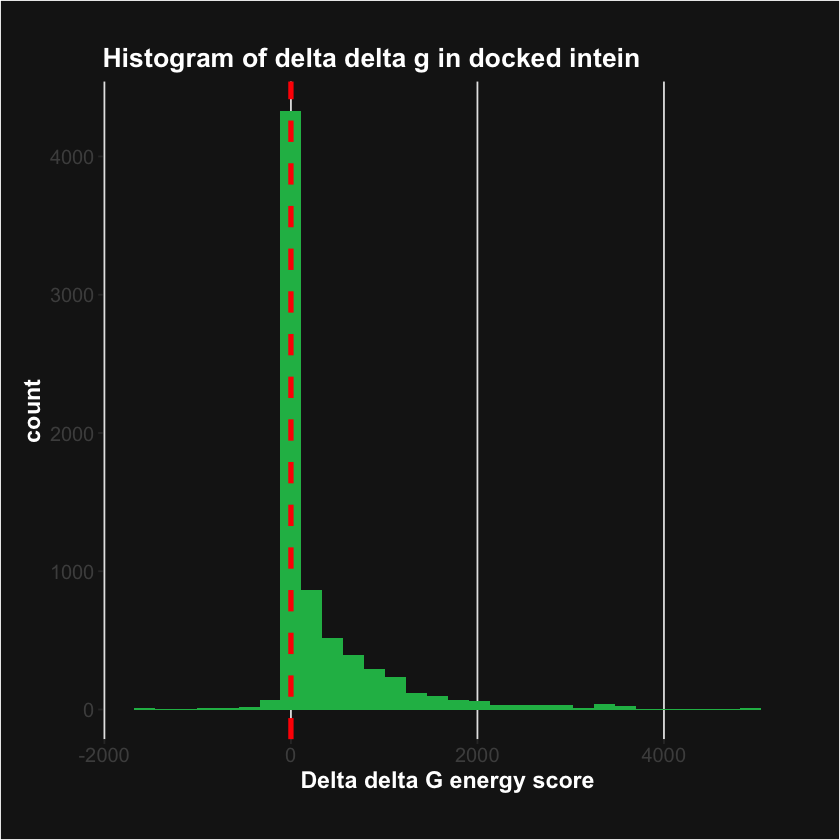

In [6]:
wildtype_ddg <- (dock_short |> filter(type == "wild_type"))$ddg_score
dock_short |> ggplot(aes(ddg_score)) + 
    geom_histogram(fill = "#1DB954") + 
    theme(plot.title = element_text(hjust = 0, size = 16, face = "bold", color = "white"),
        axis.title = element_text(size = 14, face = "bold", color = "white"),
        axis.text = element_text(size = 12),
        plot.background = element_rect(fill = "#191919"),
        panel.background = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.x = element_line(color = "gray90", size = 0.5),
        panel.grid.minor.x = element_blank()) +
  ggtitle("Histogram of delta delta g in docked intein") +
  labs(x = "Delta delta G energy score", y = "count") +
  geom_vline(xintercept = wildtype_ddg, color = "red", size = 1.5, linetype = "dashed") +
  theme(plot.margin = unit(c(1, 1, 1, 0.5), "cm"))

#### A detailed look on average ddg and P
Now let's find out what is the average ddg and what is the average ddg when amino acids arem mutate to P. 
> We can see that **mean ddg is 340 across all mutations** while it is **1830 when a single amino acid is changed to P on average**.

In [7]:
mean_ddg <- mean(dock_short$ddg_score)
dock_short_p_mutation_only <- dock_short |> filter(new_aa_1l == "P")
mean_ddg_P <- mean(dock_short_p_mutation_only$ddg_score)
glue("The mean of ddg across all mutation is {mean_ddg} and the mean ddg for when amino acids are changed to P is {mean_ddg_P}")

The mean of ddg across all mutation is 338.051909905604 and the mean ddg for when amino acids are changed to P is 1831.4399655525

#### So changing an amino acid to what decrease the ddg?
So based on the table below, where the first row is the residue_number and second row is their count in the top 100 lowest ddg scores among the mutations, we can say that
>**56th residue followed by 161st, 252nd and 333rd** are most likely to **have the lowest delta delta g scores in the event of a mutation across the amino acid chain** 

below the table you can find 10 mutations that result in the lowset ddg energy

In [8]:
lowest_ddg <- dock_short |> arrange(ddg_score) |> head(n = 100)
table(lowest_ddg$residue_number)
lowest_ddg |> head(n = 10)


 23  43  45  56  98 161 187 203 247 252 281 333 362 
  2   8   3  17   2  13   6   4   7  13   3  14   8 

type,residue_number,previous_aa,new_aa_1l,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mutant,56,R,A,3090.407,-1492.237,228,18713.75,0,47.92434,0
mutant,56,R,S,3091.759,-1490.885,228,18709.41,0,43.59362,0
mutant,56,R,C,3094.029,-1488.615,228,18709.83,0,44.00845,0
mutant,56,R,V,3094.051,-1488.593,228,18708.62,0,42.79690,0
mutant,56,R,G,3095.435,-1487.209,228,18722.49,0,56.66847,0
mutant,161,Y,G,3096.107,-1486.537,228,18690.37,0,24.55179,0
mutant,56,R,T,3101.974,-1480.671,228,18708.58,0,42.75839,0
mutant,56,R,D,3120.963,-1461.682,228,18708.43,0,42.60675,0
mutant,56,R,N,3152.143,-1430.501,228,18709.49,0,43.67178,0


### Solvent accessible surface area (SASA) analysis
Taking a look at the top values 

In [9]:
dock_short |> arrange(desc(sasa_score)) |> head()

type,residue_number,previous_aa,new_aa_1l,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mutant,118,G,W,5116.830,534.18598,228,18800.76,0,134.9359,0
mutant,171,A,W,4614.414,31.76995,228,18799.96,0,134.1420,0
mutant,264,G,W,5282.738,700.09331,228,18784.79,0,118.9654,0
mutant,295,G,W,4889.716,307.07198,228,18784.72,0,118.9006,0
mutant,83,G,W,4612.501,29.85699,228,18780.50,0,114.6790,0
mutant,369,G,W,4994.435,411.79040,228,18777.77,0,111.9502,0


#### Plotting histogram of SASA

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


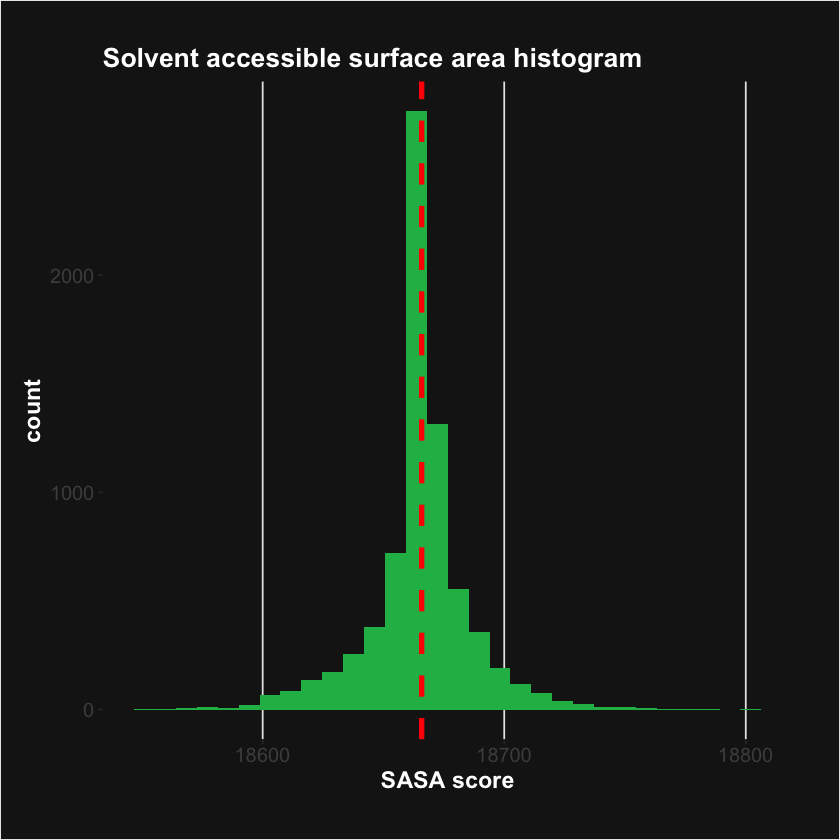

In [10]:
wildtype_sasa <- (dock_short |> filter(type == "wild_type"))$sasa_score
dock_short |> ggplot(aes(sasa_score)) + 
    geom_histogram(fill = "#1DB954") + 
    theme(plot.title = element_text(hjust = 0, size = 16, face = "bold", color = "white"),
        axis.title = element_text(size = 14, face = "bold", color = "white"),
        axis.text = element_text(size = 12),
        plot.background = element_rect(fill = "#191919"),
        panel.background = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.x = element_line(color = "gray90", size = 0.5),
        panel.grid.minor.x = element_blank()) +
  ggtitle("Solvent accessible surface area histogram") +
  labs(x = "SASA score", y = "count") +
  geom_vline(xintercept = wildtype_sasa, color = "red", size = 1.5, linetype = "dashed") +
  theme(plot.margin = unit(c(1, 1, 1, 0.5), "cm"))

#### Finding the sd of SASA

In [11]:
sd_sasa <- sd((dock_short |> filter(type == "mutant"))$sasa_score)
mean_sasa <- mean((dock_short |> filter(type == "mutant"))$sasa_score)
sd_sasa
mean_sasa

[1] 21.17853

[1] 18665.35

#### Taking a look at the values outside 2SD
In statistics, 5% of the values fall outside 2 SD. So, let's take a look at them. First let's take a look at SASA values **higher** than *Mean + 2 standard deviations*
> it seems that **mutations in residue numbers 22 and 257 considerably increase SASA**

In [12]:
higher_2sd <- dock_short |> filter(type == "mutant" & sasa_score > mean_sasa + 2*sd_sasa)
table(higher_2sd$residue_number)


  2   6   7  15  17  20  22  25  29  44  48  50  51  52  56  58  60  65  68  77 
  3   1   2   1   1   1  15   1   1   2   1   6   4   1   9   1   1   5   1   2 
 83  84  86  95 102 108 118 120 121 132 136 137 147 148 152 164 166 169 171 172 
  5   4   4   2   1   2   7   3   1   4   1   1   3   1   3   1   1   1   4   1 
176 178 179 189 191 196 209 210 211 213 214 222 223 224 225 226 239 245 246 248 
  3   1   3   1   1   3   4   2   1   1   1   2   1   1   3   2   1   5   1   2 
257 261 263 264 267 290 295 300 301 306 307 308 311 315 317 323 328 347 349 351 
 13   1   1   7   1   2   5   1   1   3   1   2   2   1   7   2   1   1   1   1 
354 355 364 369 370 378 379 
  4   1   2   4   1   2   3 

Now let's take a look at SASA values **lower** than *Mean + 2 standard deviations*
> **Mutations** in **residue number 219, 243, 107, 79, 75** and many more **considerably reduces the SASA** 

In [13]:
lower_2sd <- dock_short |> filter(type == "mutant" & sasa_score < mean_sasa - 2*sd_sasa)
table(lower_2sd$residue_number)


  1   2   3   4  14  15  35  42  47  57  65  75  79  85  86  87  88  89  90  92 
 10   3   2  10   2   1   2   1   1  11   4  14  15   2   1   2   5   8  11   3 
 93  94  97  99 103 104 107 109 120 130 141 144 186 188 209 215 217 219 226 243 
  9   6   1   1   9   3  17   1   1   4   6  10  10   4   1   1  12  19   1  18 
260 270 272 276 279 292 296 310 311 320 331 340 349 366 379 
  9   2   5  12   1  13   7   1   2   6   1   5   2   1   1 

#### A more detailed look on the low end 
> Just as expected it seems that **residue number 219 which is R** is **very sensitive to mutations** given the **drop in SASA score**

In [15]:
dock_short |> arrange(sasa_score) |> head(n = 10)

type,residue_number,previous_aa,new_aa_1l,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mutant,1,M,G,4584.853,2.2089508,228,18549.72,0,-116.10556,0
mutant,90,K,G,4579.662,-2.9821580,228,18553.98,0,-111.83688,0
mutant,219,R,A,4583.991,1.3471405,228,18562.79,0,-103.03425,0
mutant,93,K,G,4568.446,-14.1986207,228,18568.83,0,-96.99415,0
mutant,219,R,N,4589.913,7.2688242,228,18568.96,0,-96.85706,0
mutant,1,M,A,4582.797,0.1532421,228,18569.42,0,-96.40225,0
mutant,219,R,C,4585.061,2.4166360,228,18572.12,0,-93.70057,0
mutant,219,R,G,4587.203,4.5583927,228,18572.22,0,-93.60458,0
mutant,219,R,S,4583.754,1.1101893,228,18572.83,0,-92.99133,0


#### A more detailed look on the high end 
> **Chaning residues to W** seems to **considerably increase the SASA** 

In [17]:
dock_short |> arrange(desc(sasa_score)) |> head(n = 20)

type,residue_number,previous_aa,new_aa_1l,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mutant,118,G,W,5116.830,534.185979,228,18800.76,0,134.93586,0
mutant,171,A,W,4614.414,31.769952,228,18799.96,0,134.14203,0
mutant,264,G,W,5282.738,700.093309,228,18784.79,0,118.96541,0
mutant,295,G,W,4889.716,307.071983,228,18784.72,0,118.90064,0
mutant,83,G,W,4612.501,29.856985,228,18780.50,0,114.67899,0
mutant,369,G,W,4994.435,411.790403,228,18777.77,0,111.95015,0
mutant,257,Y,G,4589.480,6.836062,228,18768.24,0,102.42158,0
mutant,84,G,W,4619.098,36.453878,228,18767.86,0,102.03634,0
mutant,86,D,W,4587.365,4.720601,228,18763.05,0,97.23263,0
